<a href="https://colab.research.google.com/github/jsgf04/TdR_Physics_behind_skiing/blob/main/grafiquesdelpendolcentrfuginvertit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gràfiques del pèndol centrífug invertit**



Variables que et demanarà:


*   Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)
*   Radi dels esquís (m)
*   Velocitat de l'esquiador durant el trajecte (m/s)(constant)
*   Temps final o durada del trajecte (s)
*   Angle inicial del pèndol/de l'esquiador (º): 

Hi han dos casos:

-Quan l'esquiador/el pèndol té 3 posicions d'equilibri. Dues de simètriques (t'ho indica abans que intodueixis l'angle) i una de vertical (0º). Òbviament, si aquest límit és sobrepassat l'esquiador perd l'equilibi i cau (en el cas del pèndol actua estranyament). Per això, diem que l'inclinació del pènol/de l'esquiador no pot passar del límit o angle màxim (99% de l'angle d'equiibri).

-Quan l'esquiador/el pèndol té una posició d'equilibri que és la vertical (0º) i, a més a més, si tries qualsevol angle, mentre sigui realista o no sigui extrem, pot estar oscil·lant constantment sense quedar-se en cap posició d'equilibri.

***Posició d'equilibri significa la posició de l'esquiador en què la velocitat angular del pèndol és 0.**


---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```




ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º
Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Temps final (s): 10
No hi han posicions d'equilibri, és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)
Angle inicial del pèndol/esquiador respecte de la vertical (º): 45


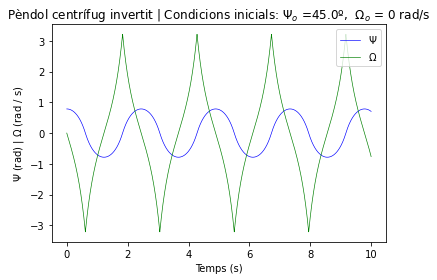

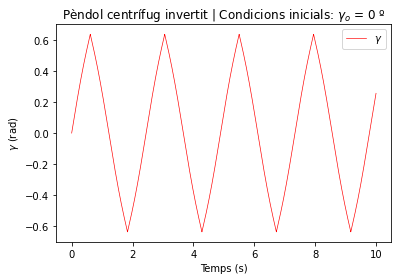

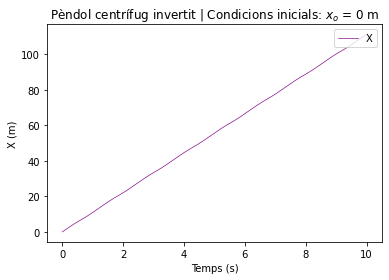

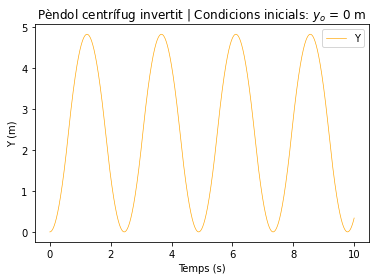

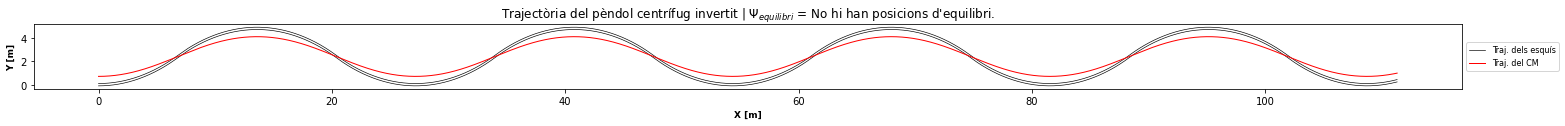

In [1]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

print(colored("ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º","red"))
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))

if V**2/(g*R_sc)<1:
  Psi_eq = round(np.arcsin(V**2/(g*R_sc))*(180/np.pi), 3)
else:
  Psi_eq = "No hi han posicions d'equilibri"

if V**2/(g*R_sc)<1:
  text2 = "${\Psi}_{equilibri}$ = ±"
else:
  text2 = "${\Psi}_{equilibri}$ = "

def equations(t,y):
    dy=np.zeros([2])
    # 0 Psi
    # 1 Omega
    dy[0] = y[1]
    dy[1] = (g/l)*np.sin(y[0])-(V**2/(l*R_sc))*np.sign(y[0])

    return dy

final_time = float(input("Temps final (s): "))
time = np.linspace(0, final_time, 100000)

if V**2/(g*R_sc)<1:
  Psi_equilibri_arr = round(0.98*Psi_eq,3)
  print("Angle d'equilibri per referència: ±"+str(Psi_eq)+"º",  colored(("[NO POT PASSAR DE ± 0.99 · \u03A8  ≈ ± "+str(Psi_equilibri_arr)+"... º]"),"red"))
else:
  print("No hi han posicions d'equilibri, és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)")

initial_Psi = float(input("Angle inicial del pèndol/esquiador respecte de la vertical (º): "))
y0 = [np.radians(initial_Psi), np.radians(0.0)]

#Solució
res = solve_ivp(equations, (0,final_time), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-8, atol=1e-10)

t, psi, omega = res.t, res.y[0], res.y[1]

dense1 = res.sol
def dgamma(t, gamma):
    Psi, Omega = dense1(t)

    return [(V*np.sign(Psi))/(R_sc*np.cos(Psi))]

initial_gamma = [np.radians(0.0)]

gamma_res = solve_ivp(dgamma, (0,final_time), initial_gamma, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
gamma_times, gammas = gamma_res.t, gamma_res.y

dense2 = gamma_res.sol
def dx(t, x):
    Gamma = dense2(t)

    return [V*np.cos(Gamma)]

initial_x = [0.0]

x_res = solve_ivp(dx, (0,final_time), initial_x, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
x_times, x_skis = x_res.t, x_res.y

def dy(t, y):
    Gamma = dense2(t)

    return [V*np.sin(Gamma)]

initial_y = [0.0]

y_res = solve_ivp(dy, (0,final_time), initial_y, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
y_times, y_skis = y_res.t, y_res.y[0]

plt.plot(t.T, psi.T,"b",linewidth = 0.65, label = "${\Psi}$")
plt.plot(t.T, omega.T,"g",linewidth = 0.65, label = "${\Omega}$")
s = 'Condicions inicials: ${\Psi}_{o}$ ='+str(initial_Psi)+'º,  ${\Omega}_{o}$ = 0 rad/s'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel(u'${\Psi}$ (rad) | ${\Omega}$ (rad / s)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.show()
plt.plot(gamma_times, gammas.T,"r",linewidth = 0.65, label = "${\gamma}$")
s = 'Condicions inicials: ${\gamma}_{o}$ = 0 º'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel(u'${\gamma}$ (rad)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()
plt.plot(x_times.T, x_skis.T,color = "purple",linewidth = 0.65, label = "X")
s = 'Condicions inicials: $x_{o}$ = 0 m'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel('X (m)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()
plt.plot(y_times.T, y_skis.T,color="orange",linewidth = 0.65, label = "Y")
s = 'Condicions inicials: $y_{o}$ = 0 m'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel('Y (m)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()

if V**2/(g*R_sc)<1:
  text1 = '... º, ${\Psi}_{màx}$ = 0.99 · ${\Psi}_{equilibri}$'
else:
  text1 = "."

x_anim = []
y3_anim = []

plt.figure(figsize=(6.4*4,4.8*4))
plt.plot(x_skis.T, y_skis.T-0.1,color="black",linewidth = 0.65, label="Traj. dels esquís")
plt.plot(x_skis.T, y_skis.T+0.1,color="black",linewidth = 0.65)

for i in range (len(psi)):
  x_anim.append(x_skis.T[i])
  CM_Y = l*np.sin(psi[i])
  y3_anim.append(y_skis.T[i]+CM_Y)

plt.plot(x_anim, y3_anim,"r", linewidth=1, label = "Traj. del CM")
plt.title('Trajectòria del pèndol centrífug invertit | '+text2+str(Psi_eq)+text1)
plt.xlabel('X [m]',fontsize=9, fontweight = "bold")
plt.ylabel('Y [m]',fontsize=9, fontweight = "bold")
plt.legend(loc='center left',fontsize=8, bbox_to_anchor=(1, 0.5))
plt.axis("scaled")
plt.show()